## The objective of this exercise is to develop and evaluate a model that can be used to predict the rating an app provided other relevant data about the app is available

### Import all libraries needed for the regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

### Load the dataframe

In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/cleaned_google_playstore_data (1).csv")

In [3]:
df.isnull().any()

App Name             False
App Id               False
Category             False
Rating               False
Rating Count         False
Installs             False
Minimum Installs     False
Maximum Installs     False
Free                 False
Price                False
Currency             False
Size                  True
Minimum Android      False
Developer Id         False
Developer Website    False
Developer Email      False
Released             False
Last Updated         False
Content Rating       False
Privacy Policy       False
Ad Supported         False
In App Purchases     False
Editors Choice       False
Scraped Time         False
dtype: bool

In [4]:
df.shape

(2312773, 24)

In [5]:
df = df.dropna()

In [6]:
df.dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs               int64
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                 float64
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

In [7]:
df.isnull().sum()

App Name             0
App Id               0
Category             0
Rating               0
Rating Count         0
Installs             0
Minimum Installs     0
Maximum Installs     0
Free                 0
Price                0
Currency             0
Size                 0
Minimum Android      0
Developer Id         0
Developer Website    0
Developer Email      0
Released             0
Last Updated         0
Content Rating       0
Privacy Policy       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
Scraped Time         0
dtype: int64

In [8]:
### lets now determine the input and output variables
X = df[['Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free','Size',]]
X.isnull().sum()

Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Size                0
dtype: int64

In [9]:
y= df['Rating']

### Lets us split the data into test and train datasets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [11]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (1790298, 6)
Test feature set size: (447575, 6)
Training variable set size: (1790298,)
Test variable set size: (447575,)


### We can now fit the model by first calling an instance of the function

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Let's now use the test data to predict the accuracy of the model

<Axes: >

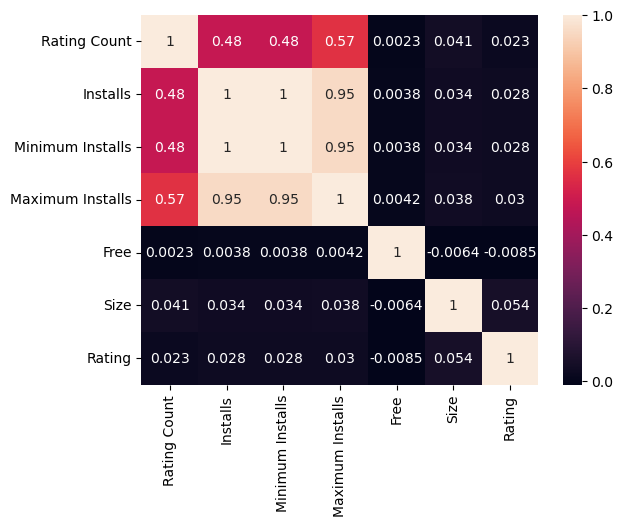

In [26]:
corrr = df[['Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs',
       'Free', 'Size', 'Rating']].corr()
import seaborn as sns
sns.heatmap(corrr, annot = True)


In [13]:
Pred_Rating = model.predict(X_test)

### Model Evaluation Parameters

In [59]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, Pred_Rating)
mse = mean_squared_error (y_test, Pred_Rating)
RMSE = np.sqrt(mse)
Input_Coeff = model.coef_
interc = model.intercept_
r2 = r2_score(y_test, Pred_Rating)

In [48]:
b= X.columns
b

Index(['Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs',
       'Free', 'Size'],
      dtype='object')

In [51]:
Input_Coeff

array([ 1.37265733e-07, -1.53394005e-09, -1.53393097e-09,  1.16763651e-08,
       -1.27100348e-01,  4.60760159e-03])

### Writing out the equation of the model

In [61]:
print (f'The prediction equations is given by Ratings = {interc}+{Input_Coeff[0]}({b[0]}) + {Input_Coeff[1]}({b[1]})+{Input_Coeff[1]}({b[2]})+{Input_Coeff[3]}({b[3]})+ {Input_Coeff[4]}({b[4]})+{Input_Coeff[5]}({b[5]})')

The prediction equations is given by Ratings = 1.3726573333647194e-07(Rating Count) + -1.5339400473612537e-09(Installs)+-1.5339400473612537e-09(Minimum Installs)+1.1676365068917693e-08(Maximum Installs)+ -0.12710034828655337(Free)+0.004607601585557564(Size)


In [63]:
print(f"R-squared: {r2:.4f}")
print (f'The mean absolute error of the model is {mae: .2f}')
print (f'The mean squared error of the model is {mse: .2f}')
print (f'The absolute mean squared error of the model is {RMSE: .2f}')
print(f'The coefficient of the variables in the model are {Input_Coeff}')

R-squared: 0.0038
The mean absolute error of the model is  2.04
The mean squared error of the model is  4.43
The absolute mean squared error of the model is  2.10
The coefficient of the variables in the model are [ 1.37265733e-07 -1.53394005e-09 -1.53393097e-09  1.16763651e-08
 -1.27100348e-01  4.60760159e-03]


### Create a visualization of model performance

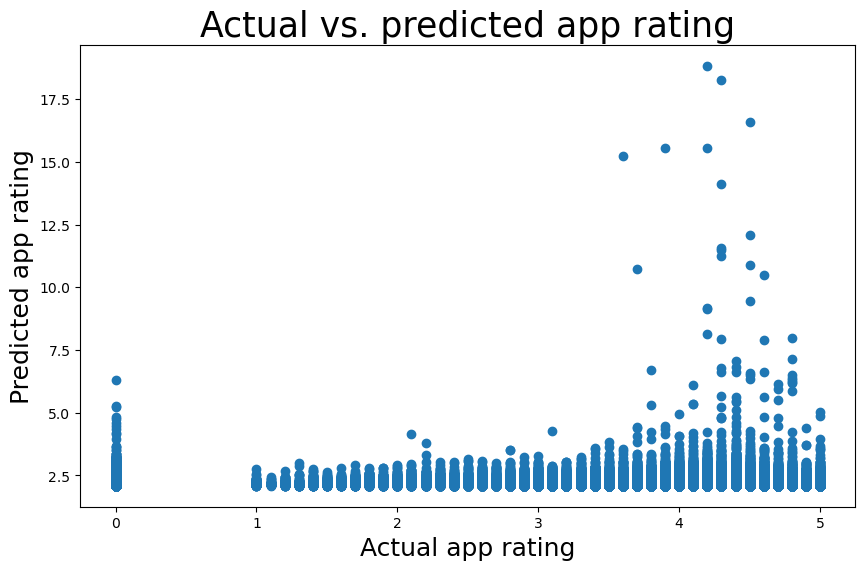

In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.title("Actual vs. predicted app rating",fontsize=25)
plt.xlabel("Actual app rating",fontsize=18)
plt.ylabel("Predicted app rating", fontsize=18)
plt.scatter(x=y_test,y=Pred_Rating)

### Scatter plot of residuals and predicted values (Homoscedasticity)**

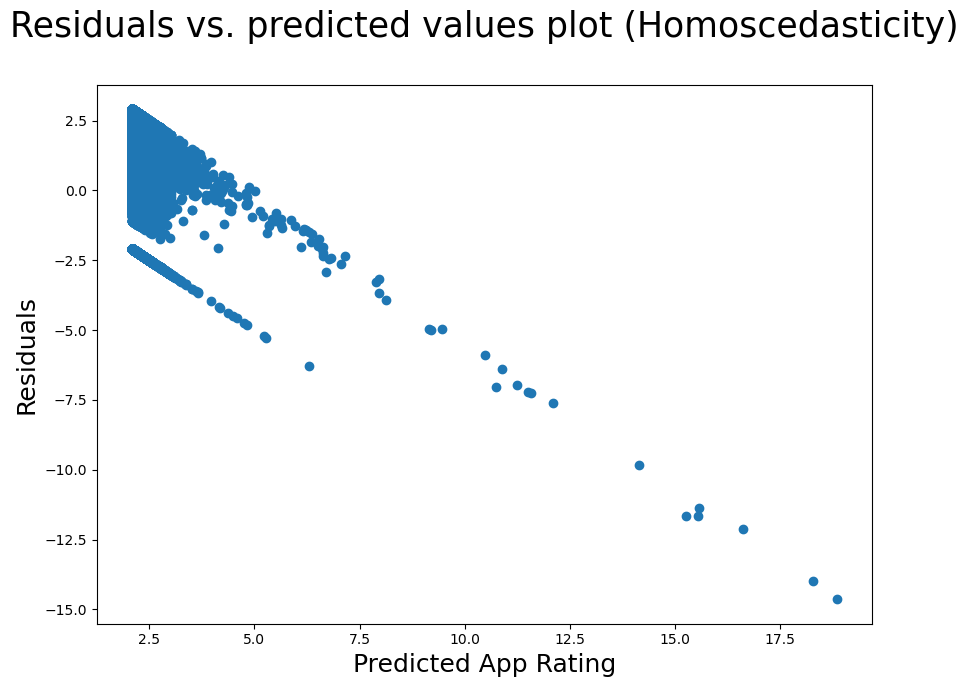

In [17]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted App Rating",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=Pred_Rating,y=y_test-Pred_Rating)